In [1]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import math


In [42]:
PATH = '/home/users/dwest77/tbworkexp/01/'
data = os.listdir(PATH)
print(data)

['ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001052359z_20071001070551z_750_799-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_000_049-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_050_099-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_700_749-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_750_799-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001084759z_20071001102951z_000_049-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001084759z_20071001102951z_050_099-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001084759z_20071001102951z_700_749-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001084759z_20071001102951z_750_799-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001102959z_20071001120855z_000_049-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001102959z_20071001120

In [ ]:
xr.open_mfdataset('/home/users/dwest77/tbworkexp/custom/ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20080204193648z_20080204202352z_150_199-v1000.nc').variables

In [44]:
def concat(data, var, dimension, moving=False):
    movement_index = [0, 0, 0, 25, 100, 125, 175]
    var_data = []
    iterations = 0
    file_path =  '/home/users/dwest77/tbworkexp/01/'
    for file in data:
        file_direction = file_path + file
        current_file_var_data = xr.open_mfdataset(file_direction)[var]
        if moving:
            current_file_var_data += movement_index[iterations]

        iterations += 1
        var_data.append(current_file_var_data)
        
        

    var_data = xr.concat(var_data, dim=dimension)
    return var_data

In [45]:
identifier = {}
for file in data:
    key= file[73:80]
    if key in identifier:
        pass
#this file type has already been saved into the dictionary
    else:
        identifier[key] = file

print(identifier)

{'750_799': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001052359z_20071001070551z_750_799-v1000.nc', '000_049': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_000_049-v1000.nc', '050_099': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_050_099-v1000.nc', '700_749': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_700_749-v1000.nc', '650_699': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001134759z_20071001152951z_650_699-v1000.nc', '600_649': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001152959z_20071001170855z_600_649-v1000.nc', '550_599': 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001185055z_20071001202951z_550_599-v1000.nc'}


In [46]:
uniquely_identified_files = list(identifier.values())
print(uniquely_identified_files)

['ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001052359z_20071001070551z_750_799-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_000_049-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_050_099-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001070559z_20071001084751z_700_749-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001134759z_20071001152951z_650_699-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001152959z_20071001170855z_600_649-v1000.nc', 'ral-l2p-tqoe-iasi_mhs_amsu_metopa-tir_mw-20071001185055z_20071001202951z_550_599-v1000.nc']


In [53]:
iclass_values = concat(uniquely_identified_files, 'ixt', 'npi')
long_values = concat(uniquely_identified_files, 'longitude', 'npi', True)
lat_values = concat(uniquely_identified_files, 'latitude', 'npi')
time_values = concat(uniquely_identified_files, 'sensingtime_day', 'npi')

In [57]:
print(iclass_values.to_numpy()[:200])

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119.   0.   1.   2.   3.   4.   5.
   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.
  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.
  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.
  48.  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.
  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.
  76. 

In [59]:
lat_filter = lat_values[np.abs(iclass_values-60)<1]
long_filter = long_values[np.abs(iclass_values-60)<1]
time_filter = time_values[np.abs(iclass_values-60)<1]

long_filter = np.array(long_filter)
lat_filter = np.array(lat_filter)
time_filter = np.array(time_filter)
print(long_filter.shape, lat_filter.shape)

#VAL_A = 157
#VAL_B = 8
#long_filter = list(np.reshape(long_filter, (VAL_A, VAL_B)))
#lat_filter = list(np.reshape(lat_filter, (VAL_A, VAL_B)))
#time_filter = list(np.reshape(lat_filter, (VAL_A, VAL_B)))

mean_of_time = time_filter
mean_of_lat = lat_filter
mean_of_long = long_filter


print(mean_of_time)
print(mean_of_lat)
print(mean_of_long)

(314,) (314,)
[2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830.
 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830.
 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830.
 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830.
 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830.
 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830.
 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830.
 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830.
 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830.
 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830.
 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830.
 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830.
 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830. 2830.
 2830. 2830. 2830. 2830. 2830. 2830. 

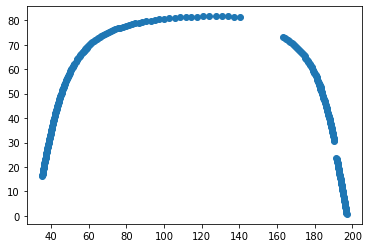

In [60]:
plt.scatter(mean_of_long, mean_of_lat)

In [61]:
test_to_variables = []
i = 36
while i <= 200:
    i += 4
    test_to_variables.append(i)

In [64]:
lat_buckets = []
for x in range(0, len(long_buckets)):
    lat_buckets.append([])

In [63]:
long_buckets = []
for x in range(0, 200, 4):
    long_buckets.append(x)

In [65]:
for x in range(len(mean_of_lat)):
    current_latitudanal_value = mean_of_lat[x]
    current_longitudanal_value = mean_of_long[x]
    bucket_id = (current_longitudanal_value)/4
    bucket_id = math.floor(bucket_id)
    print(current_longitudanal_value, current_latitudanal_value, bucket_id)
    lat_buckets[bucket_id].append(current_latitudanal_value)
    
print(lat_buckets)

59.013294 68.8602 14
58.462593 68.427246 14
57.930244 67.99261 14
57.418205 67.556496 14
56.921326 67.11952 14
56.441467 66.68086 14
55.97731 66.24104 13
55.527966 65.80037 13
55.0921 65.3569 13
54.6647 64.91227 13
54.26054 64.47069 13
53.863106 64.024574 13
53.476223 63.578342 13
53.10151 63.13133 13
52.380512 62.23522 13
52.03473 61.78588 13
51.697105 61.335667 12
51.369354 60.88514 12
51.048935 60.433712 12
50.7364 59.9816 12
50.431297 59.52892 12
50.133484 59.075752 12
49.842506 58.622 12
49.55812 58.167606 12
49.279972 57.712875 12
49.007774 57.257458 12
48.741528 56.801743 12
48.480587 56.34553 12
48.225063 55.88878 12
47.97453 55.4317 11
47.729225 54.97415 11
47.48844 54.516197 11
47.25232 54.057938 11
47.02053 53.59928 11
46.792896 53.14028 11
46.56934 52.680916 11
46.34982 52.221405 11
46.134632 51.76132 11
45.921997 51.30121 11
45.71333 50.84039 11
45.507847 50.37933 11
45.306095 49.91804 11
45.106766 49.456635 11
44.91115 48.99536 11
44.718044 48.533154 11
44.52808 48.070946

In [66]:
mean_of_lat_buckets = []
mean_of_long_buckets = []
for bid, bucket in enumerate(lat_buckets):
    total = 0
    for val in bucket:
        total += val
    if len(bucket) != 0:
        total = total / len(bucket)
        mean_of_lat_buckets.append(total)
        mean_of_long_buckets.append(long_buckets[bid])

print(mean_of_long_buckets)
print(mean_of_lat_buckets)

[32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100, 104, 108, 112, 116, 120, 124, 128, 132, 136, 140, 160, 164, 168, 172, 176, 180, 184, 188, 192, 196]
[17.9290554523468, 27.31954973936081, 40.873677473801834, 51.29643430207905, 58.618214240440956, 64.153662109375, 68.16837897667519, 71.07643280029296, 73.15365905761719, 74.9546947479248, 76.29349009195964, 77.38235473632812, 78.23942184448242, 78.88105773925781, 79.47817611694336, 80.02267074584961, 80.39261627197266, 80.71917724609375, 81.00749969482422, 81.24323654174805, 81.43181610107422, 81.52790832519531, 81.59664916992188, 81.64744567871094, 81.64585876464844, 81.61044311523438, 81.54740905761719, 81.46253967285156, 73.156494140625, 71.70679016113282, 69.15586526053292, 65.66041098700629, 60.968899726867676, 53.76197234443996, 44.35552708307902, 32.497742132707074, 13.503963509121457, 2.675914181603326]


42

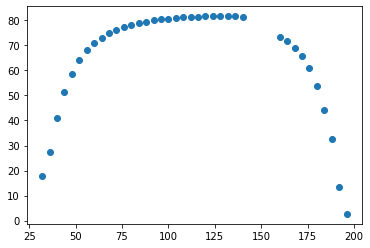

In [67]:
plt.scatter(mean_of_long_buckets, mean_of_lat_buckets)
plt.show()

In [110]:
json_file_coords = np.reshape(np.transpose([mean_of_long_buckets, mean_of_lat_buckets]), (len(mean_of_lat_buckets), 2))

In [111]:
print(json_file_coords.tolist())

[[32.0, 17.32132911682129], [36.0, 26.242319226264954], [40.0, 39.79808807373047], [44.0, 49.992669423421226], [48.0, 57.31864765712193], [52.0, 62.9966323852539], [56.0, 67.55452074323382], [60.0, 70.65967305501302], [64.0, 72.73310852050781], [68.0, 74.3325080871582], [72.0, 75.86193084716797], [76.0, 76.95217895507812], [80.0, 77.64075469970703], [84.0, 78.2945556640625], [88.0, 78.90641784667969], [92.0, 79.4703140258789], [96.0, 79.97740936279297], [100.0, 80.41854858398438], [104.0, 80.78475952148438], [112.0, 81.06663513183594], [116.0, 81.25647735595703], [124.0, 81.34730529785156], [128.0, 81.33673858642578], [136.0, 81.2250747680664], [160.0, 73.06367492675781], [164.0, 71.41726430257161], [168.0, 68.44729042053223], [172.0, 64.95373725891113], [176.0, 60.03673825945173], [180.0, 52.836035988547586], [184.0, 43.423086166381836], [188.0, 30.143909613291424], [192.0, 11.863453110059103], [196.0, 1.9764919678370159]]
